## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import hvplot.pandas
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt
import xarray as xr

#  Import and read the charity_data.csv.
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN', 'NAME'], inplace=True)
application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df['ASK_AMT'].value_counts()

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [4]:
application_df['INCOME_AMT'].value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
app_type_cnt=application_df['APPLICATION_TYPE'].value_counts()
app_type_cnt

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 528
application_types_to_replace = list(app_type_cnt[app_type_cnt < cutoff].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
app_clss_cnt=application_df['CLASSIFICATION'].value_counts()
app_clss_cnt

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
app_clss_cnt_gt_1 = app_clss_cnt[app_clss_cnt >1].index
app_clss_cnt_gt_1

Index(['C1000', 'C2000', 'C1200', 'C3000', 'C2100', 'C7000', 'C1700', 'C4000',
       'C5000', 'C1270', 'C2700', 'C2800', 'C7100', 'C1300', 'C1280', 'C1230',
       'C1400', 'C7200', 'C2300', 'C1240', 'C8000', 'C7120', 'C1500', 'C1800',
       'C6000', 'C1250', 'C8200', 'C1238', 'C1278', 'C1235', 'C1237', 'C7210',
       'C2400', 'C1720', 'C4100', 'C1257', 'C1600', 'C1260', 'C2710', 'C0',
       'C3200', 'C1234', 'C1246', 'C1267', 'C1256'],
      dtype='object')

In [10]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff=1883
classifications_to_replace = app_clss_cnt[app_clss_cnt < cutoff].index
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff=1883
classifications_to_replace = app_clss_cnt[app_clss_cnt < cutoff].index
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_enc_df=pd.get_dummies(application_df)
application_enc_df.head()


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
application_enc_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:


# Assuming df is your DataFrame
# Calculate the sum of values in each column
column_sums = application_enc_df.sum(axis=0)

# Print the sum of values in each column
print("Sum of values in each column:")
print(column_sums)


Sum of values in each column:
STATUS                                34294
ASK_AMT                         94980745596
IS_SUCCESSFUL                         18261
APPLICATION_TYPE_Other                  276
APPLICATION_TYPE_T10                    528
APPLICATION_TYPE_T19                   1065
APPLICATION_TYPE_T3                   27037
APPLICATION_TYPE_T4                    1542
APPLICATION_TYPE_T5                    1173
APPLICATION_TYPE_T6                    1216
APPLICATION_TYPE_T7                     725
APPLICATION_TYPE_T8                     737
AFFILIATION_CompanySponsored          15705
AFFILIATION_Family/Parent                64
AFFILIATION_Independent               18480
AFFILIATION_National                     33
AFFILIATION_Other                         4
AFFILIATION_Regional                     13
CLASSIFICATION_C1000                  17326
CLASSIFICATION_C1200                   4837
CLASSIFICATION_C2000                   6074
CLASSIFICATION_C2100                   1883
CL

In [15]:
application_enc_df.shape

(34299, 44)

In [16]:
columns_list = application_enc_df.columns.tolist()
columns_list

['STATUS',
 'ASK_AMT',
 'IS_SUCCESSFUL',
 'APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T10',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'APPLICATION_TYPE_T7',
 'APPLICATION_TYPE_T8',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_

In [17]:
application_enc_df['ASK_AMT'].hvplot()

:Curve   [index]   (ASK_AMT)

In [18]:
application_enc_df.shape

(34299, 44)

In [19]:
# Split our preprocessed data into our features and target arrays
y = application_enc_df["IS_SUCCESSFUL"]
X = application_enc_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=13, stratify=y)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Compile, Train and Evaluate the Model

In [21]:
number_input_features = len(X_train[0])
print(number_input_features)

43


In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])



nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=34, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=25,  activation="relu" ))
nn.add(tf.keras.layers.Dense(units=16,  activation="tanh" ))
nn.add(tf.keras.layers.Dense(units=7,  activation="tanh" ))
# Output layerZ
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 34)                1496      
                                                                 
 dense_1 (Dense)             (None, 25)                875       
                                                                 
 dense_2 (Dense)             (None, 16)                416       
                                                                 
 dense_3 (Dense)             (None, 7)                 119       
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 2,914
Trainable params: 2,914
Non-trainable params: 0
_________________________________________________________________


In [23]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



In [24]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


2024-03-12 14:45:49.498378: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


804/804 [==============================] - 1s 685us/step - loss: 0.5715 - accuracy: 0.7189
Epoch 2/100
804/804 [==============================] - 1s 652us/step - loss: 0.5550 - accuracy: 0.7301
Epoch 3/100
804/804 [==============================] - 1s 627us/step - loss: 0.5519 - accuracy: 0.7314
Epoch 4/100
804/804 [==============================] - 0s 601us/step - loss: 0.5519 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 1s 666us/step - loss: 0.5491 - accuracy: 0.7320
Epoch 6/100
804/804 [==============================] - 1s 698us/step - loss: 0.5494 - accuracy: 0.7313
Epoch 7/100
804/804 [==============================] - 0s 606us/step - loss: 0.5480 - accuracy: 0.7334
Epoch 8/100
804/804 [==============================] - 0s 598us/step - loss: 0.5476 - accuracy: 0.7325
Epoch 9/100
804/804 [==============================] - 1s 636us/step - loss: 0.5470 - accuracy: 0.7331
Epoch 10/100
804/804 [==============================] - 1s 762us/step - loss: 0.5470 

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5549 - accuracy: 0.7275 - 251ms/epoch - 936us/step
Loss: 0.5548819899559021, Accuracy: 0.7274635434150696


In [26]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

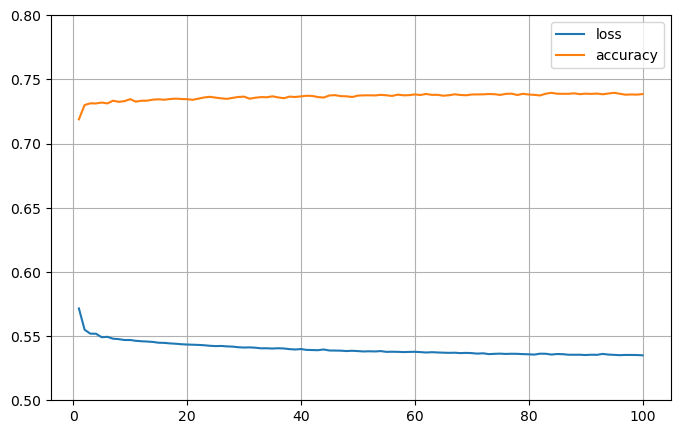

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.5,0.8)
plt.show()

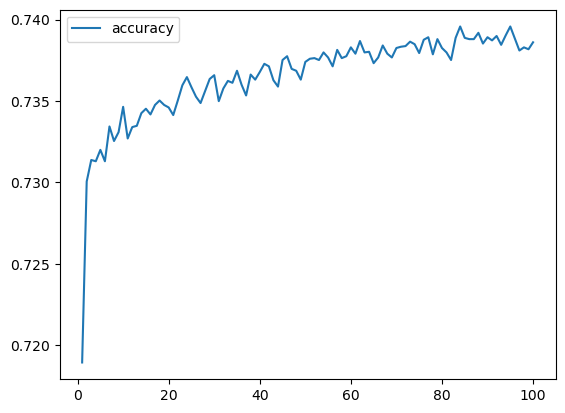

In [28]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

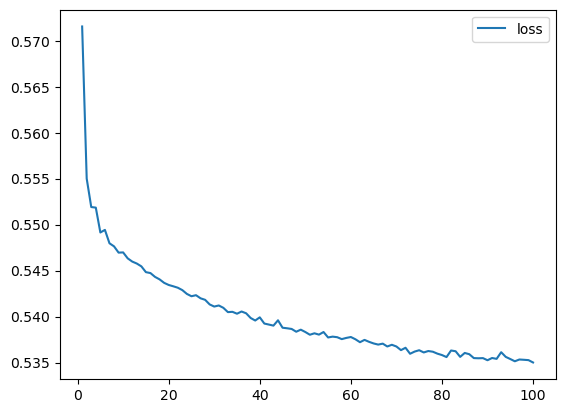

In [29]:
# Plot the accuracy
history_df.plot(y="loss")
plt.show()